## Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import os,sys
sys.path.append(os.path.abspath(os.path.join('..')))
from scripts.eda import EDA

In [3]:
# reading the csv file
missing_values = ["n/a", "na", "undefined"]
df = pd.read_csv("../data/AdSmartABdata.csv", na_values=missing_values)
eda = EDA(df)

## General statistics 

In [4]:
eda.descriptive_stats(size=True)

(8077, 9)

In [5]:
# data types of columns
eda.descriptive_stats(info=True)

<bound method DataFrame.info of                                 auction_id experiment        date  hour  \
0     0008ef63-77a7-448b-bd1e-075f42c55e39    exposed  2020-07-10     8   
1     000eabc5-17ce-4137-8efe-44734d914446    exposed  2020-07-07    10   
2     0016d14a-ae18-4a02-a204-6ba53b52f2ed    exposed  2020-07-05     2   
3     00187412-2932-4542-a8ef-3633901c98d9    control  2020-07-03    15   
4     001a7785-d3fe-4e11-a344-c8735acacc2c    control  2020-07-03    15   
...                                    ...        ...         ...   ...   
8072  ffea24ec-cec1-43fb-b1d1-8f93828c2be2    exposed  2020-07-05     7   
8073  ffea3210-2c3e-426f-a77d-0aa72e73b20f    control  2020-07-03    15   
8074  ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7    control  2020-07-04     9   
8075  ffeeed62-3f7c-4a6e-8ba7-95d303d40969    exposed  2020-07-05    15   
8076  fffbb9ff-568a-41a5-a0c3-6866592f80d8    control  2020-07-10    14   

             device_make  platform_os                browser  yes  

In [6]:
# descriptive statistics that summarize the central tendency, dispersion of the df's numerical columns
eda.descriptive_stats(describe=True)

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


In [7]:
# checking for missing values
eda.has_missing_values()

False

In [8]:
# unique value counts
unique_counts = df['auction_id'].nunique()
unique_counts

8077

In [9]:
# unique value counts of experiment
counts_df = df['experiment'].value_counts()
counts_df

control    4071
exposed    4006
Name: experiment, dtype: int64

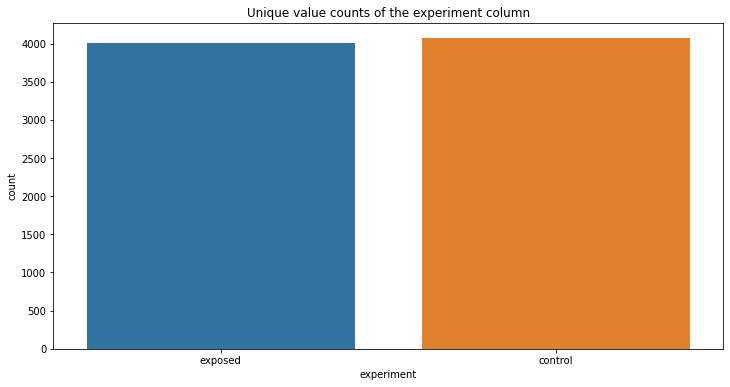

In [10]:
eda.plot_counts("experiment",type="univariate")

For the experiment we notice that there are 4071 members in the 
control group and as for the exposed group we notice that there are 4006 members, 
this means there are more members in the control group than in the exposed group


In [11]:
# unique value counts
counts_df = df['date'].value_counts()
counts_df

2020-07-03    2015
2020-07-09    1208
2020-07-08    1198
2020-07-04     903
2020-07-10     893
2020-07-05     890
2020-07-06     490
2020-07-07     480
Name: date, dtype: int64

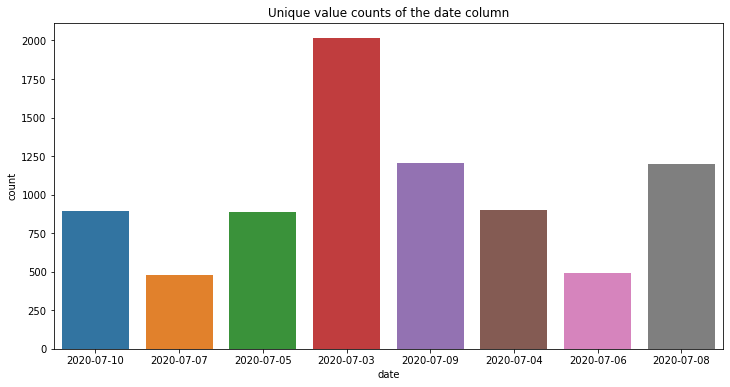

In [12]:
date_plot = eda.plot_counts("date",type="univariate")

For the dates we notice that 2020-07-03 has the most frequency with 2015, 
and the lowest count was on 2020-07-07 with a count of 480, 
that is just 4 days later, so we see that it 


In [13]:
# unique value counts of devices
counts_df = df['device_make'].value_counts()
counts_df

Generic Smartphone     4743
iPhone                  433
Samsung SM-G960F        203
Samsung SM-G973F        154
Samsung SM-G950F        148
                       ... 
Samsung SM-A505F          1
D5803                     1
Samsung SM-G6100          1
HTC M10h                  1
XiaoMi Redmi Note 5       1
Name: device_make, Length: 270, dtype: int64

In [14]:
df['device_make'].nunique()

270

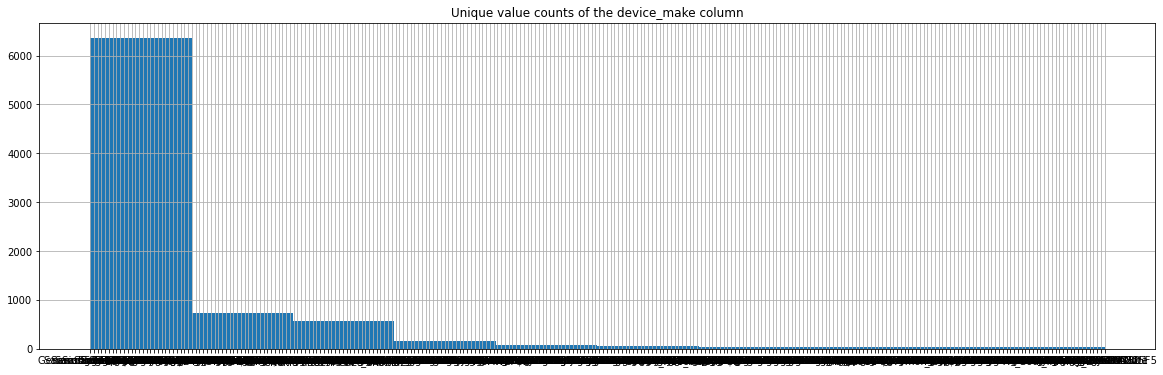

In [27]:
# eda.plot_counts("device_make",type="univariate")
plt.figure(figsize=(20, 6))
df['device_make'].hist()
plt.title(f'Unique value counts of the device_make column');
plt.show()

For the devices we notices that most of the members are using the generic smartphone
with a count of 4743 and the lowest is the XiaoMi Redmi Note 5 with only 1 person using it


In [28]:
# unique value counts of the platforms used
counts_df = df['platform_os'].value_counts()
counts_df

6    7648
5     428
7       1
Name: platform_os, dtype: int64

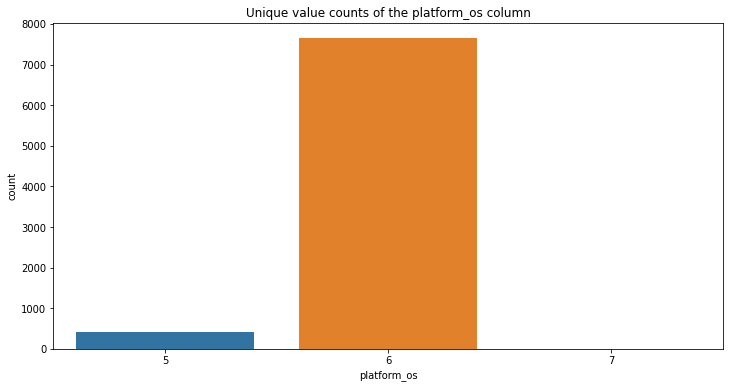

In [29]:
platform_plot = eda.plot_counts("platform_os",type="univariate")

For the platform os we notice that 6 is the one with the highest count of 7648 and 7 the lowest having only 1 member.


In [30]:
# unique value counts of the browser
counts_df = df['browser'].value_counts()
counts_df

Chrome Mobile                 4554
Chrome Mobile WebView         1489
Samsung Internet               824
Facebook                       764
Mobile Safari                  337
Chrome Mobile iOS               51
Mobile Safari UI/WKWebView      44
Chrome                           3
Pinterest                        3
Opera Mobile                     3
Opera Mini                       1
Edge Mobile                      1
Android                          1
Firefox Mobile                   1
Puffin                           1
Name: browser, dtype: int64

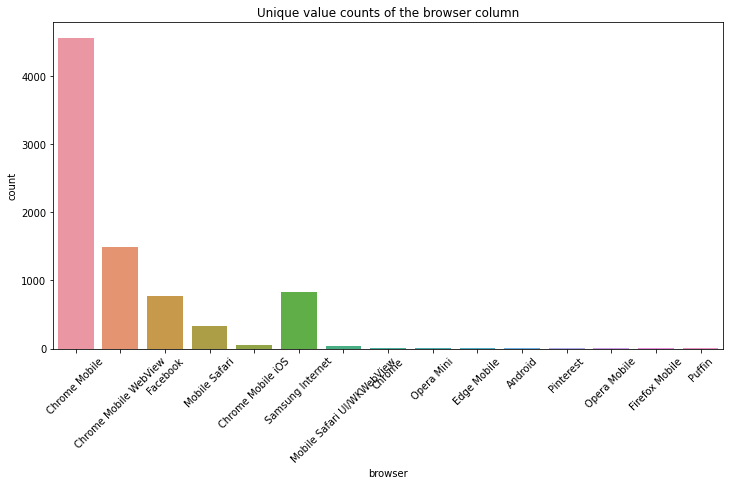

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="browser")
plt.title('Unique value counts of the browser column')
plt.xticks(rotation=45)
plt.show()

For the browsers we can see that most of the people are using the chrome OS 
with a count of 4554 and the least used browser is puffin with only 1 user


In [21]:
# unique value counts of people who are aware of the company
counts_df = df['yes'].value_counts()
counts_df

0    7505
1     572
Name: yes, dtype: int64

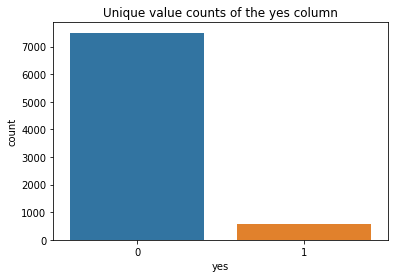

In [30]:
sns.countplot(data=df, x="yes")
plt.title('Unique value counts of the yes column')
plt.show()

In [23]:
# unique value counts of the people who are not aware of the company
counts_df = df['no'].value_counts()
counts_df

0    7406
1     671
Name: no, dtype: int64

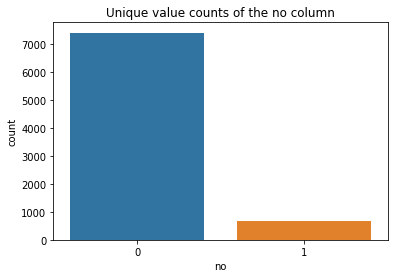

In [31]:
sns.countplot(data=df, x="no")
plt.title('Unique value counts of the no column')
plt.show()

Throughout the experiment we notice that most of the people responded by saying no with a 
count of 671 in total than those who said yes with a count of 572, that is from both of the groups exposed and control


## Bivariate Analysis

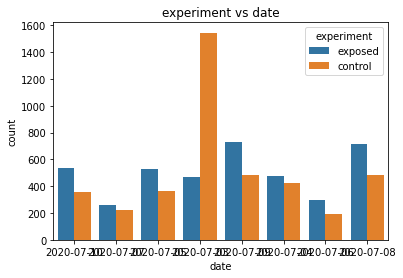

In [14]:
# Experiment with Date
experiment_date = eda.plot_counts("experiment","date","bivariate")

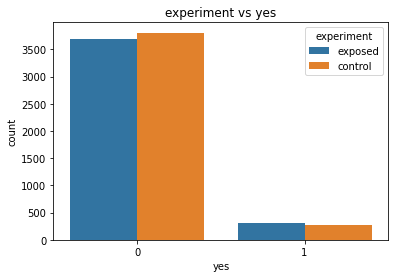

In [15]:
experiment_yes=eda.plot_counts("experiment","yes","bivariate")

## Correlation Analysis

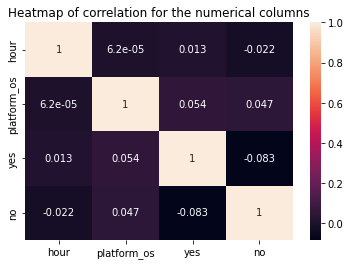

In [16]:
correlations = eda.correlation_analysis()